# NEURAL NETWORKS

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING TRAINDATASET

In [75]:
train_df = pd.read_csv("train.csv")
data = np.array(train_df)
train_df

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0.121569,0.094118,0.427451,0.725490,0.752941,0.729412,0.733333,0.737255,0.749020,...,0.505882,0.505882,0.494118,0.490196,0.494118,0.490196,0.486275,0.482353,0.478431,0.513725
1,0,0.074510,0.074510,0.074510,0.074510,0.192157,0.211765,0.239216,0.227451,0.223529,...,0.239216,0.266667,0.247059,0.254902,0.239216,0.247059,0.247059,0.250980,0.254902,0.290196
2,0,0.501961,0.521569,0.537255,0.529412,0.521569,0.537255,0.552941,0.533333,0.541176,...,0.149020,0.172549,0.156863,0.423529,0.545098,0.380392,0.619608,0.643137,0.631373,0.647059
3,0,0.058824,0.152941,0.164706,0.474510,0.458824,0.368627,0.431373,0.458824,0.603922,...,0.294118,0.309804,0.305882,0.309804,0.258824,0.478431,0.474510,0.462745,0.494118,0.447059
4,0,0.000000,0.000000,0.003922,0.000000,0.000000,0.023529,0.000000,0.000000,0.000000,...,0.003922,0.000000,0.003922,0.003922,0.000000,0.007843,0.000000,0.000000,0.000000,0.007843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9,0.392157,0.384314,0.231373,0.152941,0.454902,0.439216,0.439216,0.466667,0.454902,...,0.239216,0.227451,0.223529,0.231373,0.239216,0.239216,0.243137,0.243137,0.243137,0.235294
7996,9,0.380392,0.396078,0.388235,0.396078,0.388235,0.384314,0.400000,0.384314,0.388235,...,0.333333,0.333333,0.294118,0.317647,0.325490,0.305882,0.313725,0.305882,0.301961,0.282353
7997,9,0.482353,0.462745,0.509804,0.525490,0.521569,0.521569,0.541176,0.709804,0.717647,...,0.749020,0.725490,0.529412,0.498039,0.729412,0.764706,0.317647,0.329412,0.309804,0.317647
7998,9,0.329412,0.113725,0.349020,0.337255,0.345098,0.329412,0.329412,0.325490,0.317647,...,0.301961,0.392157,0.505882,0.486275,0.533333,0.486275,0.509804,0.501961,0.509804,0.270588


In [80]:
np.random.shuffle(data)
m, n = data.shape
data_train = data.T
y_train = data_train[0].astype(int)
x_train = data_train[1:n]

# Defining Functions required to implement a Two Layer Neural Network

In [83]:

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z = Z.astype(float)
    exp = np.exp(Z - Z.max())
    return (exp / np.sum(exp, axis=0))

def cross_entropy_loss(A2,Y,W1,W2,reg):
    loss = np.mean(-np.sum(np.log(A2[Y, np.arange(m)])))
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)   
    return loss
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y,num,reg):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / num * dZ2.dot(A1.T)
    db2 = 1 / num * np.sum(dZ2, axis=1, keepdims=True) 
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / num * dZ1.dot(X.T)
    db1 = 1 / num  * np.sum(dZ1, axis=1, keepdims=True)
    dW1 += reg*W1
    dW2 += reg*W2
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Running Gradient Descent on the Training Dataset

In [ ]:
def gradient_descent(x, y, iterations, alpha,num):
    W1 = np.random.rand(100, 784) - 0.5 
    B1 = np.random.rand(100, 1) - 0.5
    W2 = np.random.rand(10, 100) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    reg = 0.001
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, x)
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, W1,W2, x, y,num,reg)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 100000== 0:
            print("Iteration: ", i)
            loss = cross_entropy_loss(A2,y,W1,W2,reg)
            accuracy = get_accuracy(get_predictions(A2),y)
            print (f"Accuracy: {accuracy}")
            print(f"Total Loss: {loss} ")
    return W1, B1, W2, B2

W1, B1, W2, B2 = gradient_descent(x_train,y_train, 500000, 0.01,num)

Iteration:  0
Accuracy: 0.09625
Total Loss: 85551.94092517356 


# Testing Neural Network on Test Dataset

In [84]:
data_test = pd.read_csv('test.csv')
data_test = np.array(data_test)
np.random.shuffle(data_test)
data_test = data_test.T
j, k = data_test.shape
Y_test = data_test[0]
X_test = data_test[1:k]


def predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_test[:, index, None]
    prediction = predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image.astype(int))
    plt.show()


785 2000


Prediction:  moe szyslak
Label:  homer simpson


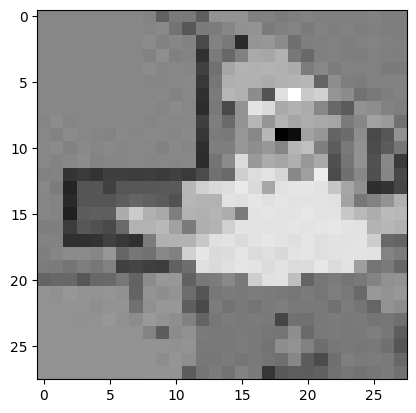

Prediction:  milhouse van houten
Label:  milhouse van houten


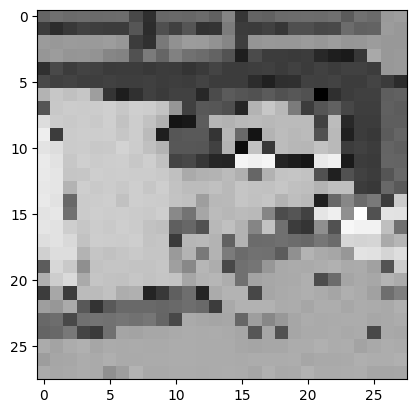

Prediction:  moe szyslak
Label:  moe szyslak


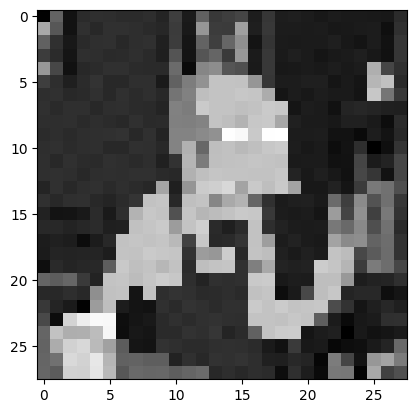

Prediction:  charles montgomery_burns
Label:  charles montgomery_burns


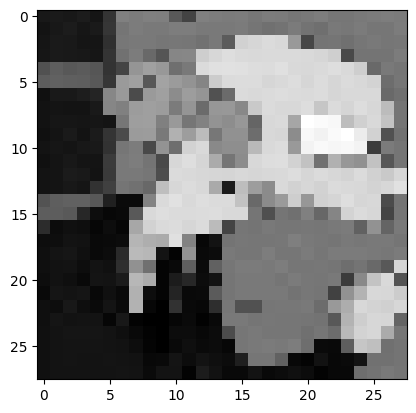

Accuracy for test Dataset:24.55%


In [85]:
test_prediction(10,W1, B1, W2, B2)
test_prediction(20, W1, B1, W2, B2)
test_prediction(30, W1, B1, W2, B2)
test_prediction(40, W1, B1, W2, B2)

test_accuracy = get_accuracy(predictions(X_test,W1,B1,W2,B2),Y_test)

print (f"Accuracy for test Dataset:{test_accuracy*100}%")